In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('DataSet/Sentiment.csv')

In [13]:
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [15]:
df.isnull().sum()

id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64

In [20]:
df.sentiment.unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [21]:
train, test = train_test_split(data,test_size = 0.1)

In [50]:
# Removing neutral sentiments
train = train[train['sentiment'] != "Neutral"]

In [64]:
train_pos = train[train['sentiment'] == "Positive"]
train_pos = train_pos['text']
train_pos.shape

(2005,)

In [67]:
train_neg = train[train['sentiment'] == "Negative"]
train_neg = train_neg['text']
train_neg.shape
print(train_neg)

1149     RT @G_Humbertson: Trump claimed last night tha...
3356     I'm pretty sure that Megan KKKelly had the big...
4652     Woke up thinking I had a hilarious dream but t...
7154     .@CNBC- If u don't bother to mention all the m...
11340    RT @RWSurferGirl: Jeb Bush reminds me of eleva...
                               ...                        
9413     RT @jsc1835: Chris Christie - You want to incr...
6419     Obviously #Trump has captured the white vote. ...
1878     RT @shannonrwatts: 18 states have done what co...
313      RT @TheJimHughes: There will be a lot of jobs ...
5377     RT @heysarahsweeney: Didn't Nostradamus predic...
Name: text, Length: 7645, dtype: object


In [72]:
def wordcloud(data,color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split() 
                             if 'http' not in word and not word.startswith('@')
                             and not word.startswith('#')and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


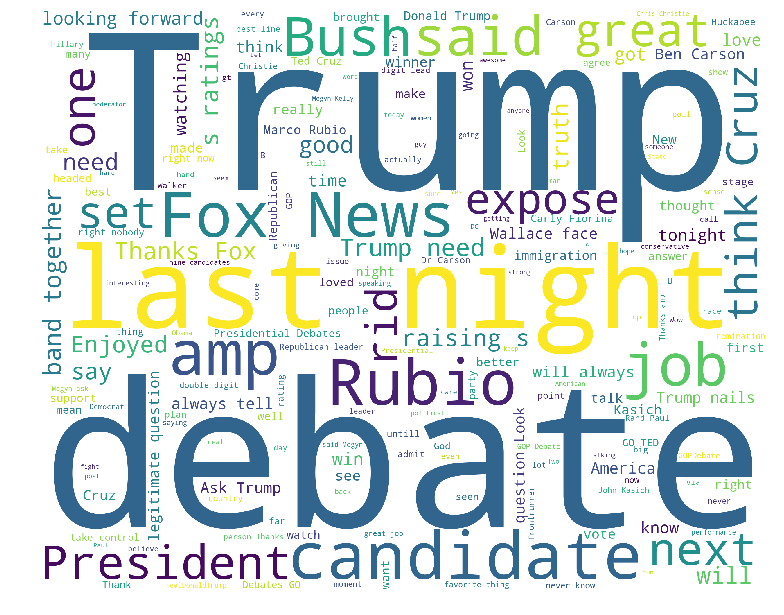

Negative words


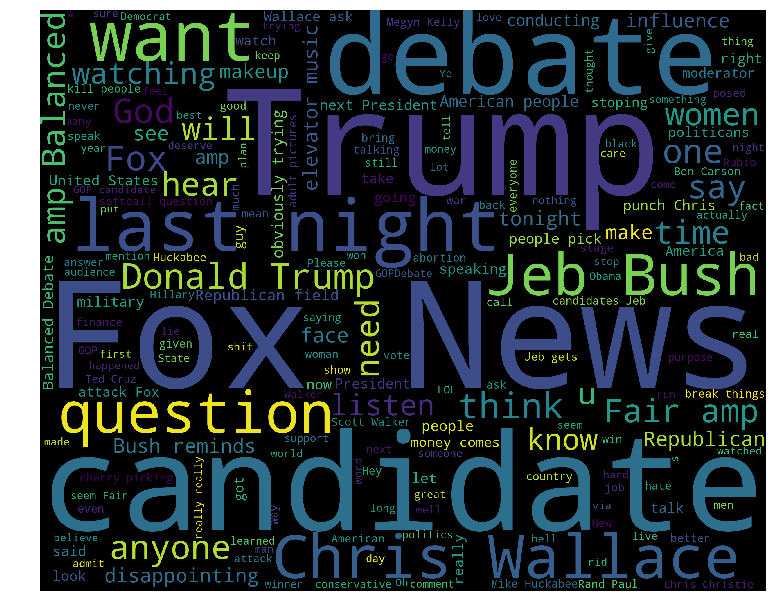

In [73]:
print("Positive words")
wordcloud(train_pos,'white')
print("Negative words")
wordcloud(train_neg)

In [84]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index,row  in train.iterrows():
    word_filter = [e.lower() for e in row.text.split() if len(e) >= 3 ]
    words_cleaned = [word for word in word_filter
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']    
    

In [97]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

<FreqDist with 14565 samples and 76311 outcomes>


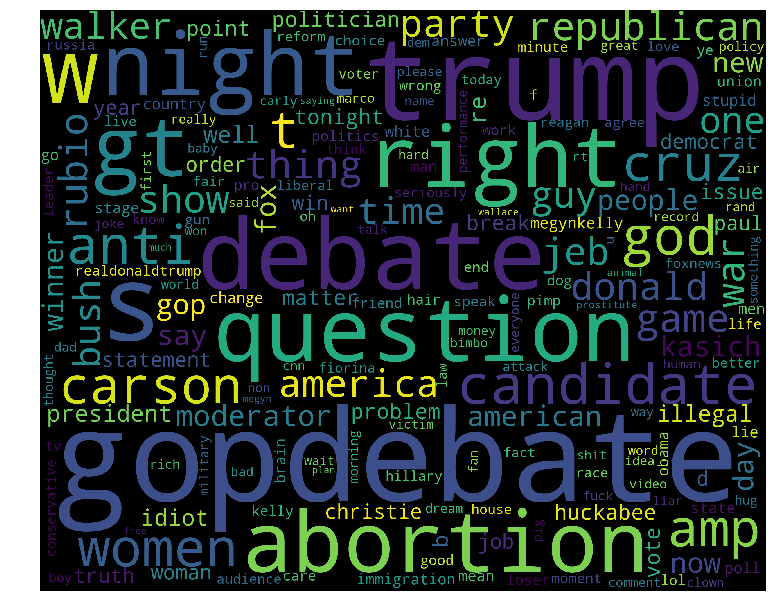

In [90]:
wordcloud(w_features)

In [91]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [92]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))   

[Negative]: 848/809 
[Positive]: 231/79 
